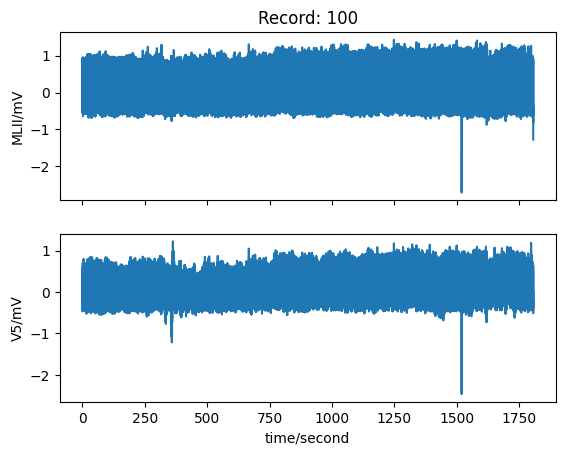

{'record_name': '100', 'n_sig': 2, 'fs': 360, 'counter_freq': None, 'base_counter': None, 'sig_len': 650000, 'base_time': None, 'base_date': None, 'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal'], 'sig_name': ['MLII', 'V5'], 'p_signal': array([[-0.145, -0.065],
       [-0.145, -0.065],
       [-0.145, -0.065],
       ...,
       [-0.675, -0.365],
       [-0.765, -0.335],
       [-1.28 ,  0.   ]]), 'd_signal': None, 'e_p_signal': None, 'e_d_signal': None, 'file_name': ['100.dat', '100.dat'], 'fmt': ['212', '212'], 'samps_per_frame': [1, 1], 'skew': [None, None], 'byte_offset': [None, None], 'adc_gain': [200.0, 200.0], 'baseline': [1024, 1024], 'units': ['mV', 'mV'], 'adc_res': [11, 11], 'adc_zero': [1024, 1024], 'init_value': [995, 1011], 'checksum': [-22131, 20052], 'block_size': [0, 0]}


In [ ]:
import wfdb
import csv

patient_record = wfdb.rdrecord("100")
wfdb.plot_wfdb(patient_record) # plots the ECG
print(patient_record.__dict__) # prints the attributes of the record

In [32]:
# Extract patient INFO, LEAD NAMES, and ECG_SIGNAL
def create_csv(patient_n):
    patient_record = wfdb.rdrecord(patient_n)
    leads = patient_record.sig_name
    ecg_data = patient_record.p_signal

    # CSVs creation and writing
    filename = f"{patient_n}_ecg.csv"
    outfile = open(filename, "w")
    out_csv = csv.writer(outfile)

    out_csv.writerow(leads)
    for row in ecg_data:
        out_csv.writerow(row)

    outfile.close()

    filename = f"{patient_n}_record.csv"
    outfile = open(filename, "w")
    out_csv = csv.writer(outfile)

    out_csv.writerow(["patient_n, n_leads, Age, Sex"])
    comments = patient_record.comments[0].split()
    age = comments[0]
    sex = comments[1]
    out_csv.writerow([f"{patient_number}, {patient_record.n_sig}, {age}, {sex}"])
    outfile.close()

In [18]:
# Patients numbers
with open("RECORDS", "r") as file:
    numbers = [int(line.strip()) for line in file]

# Print the resulting array
print(numbers)

for patient_n in numbers:
    create_csv(str(patient_n))

[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 200, 201, 202, 203, 205, 207, 208, 209, 210, 212, 213, 214, 215, 217, 219, 220, 221, 222, 223, 228, 230, 231, 232, 233, 234]


In [19]:
def create_csv2(patient_n):
    annotation = wfdb.rdann(patient_n, 'atr')
    annotation_symbols = annotation.symbol  # Annotation symbols (e.g., N, L, R, V, etc.)
    annotation_locations = annotation.sample  # Locations of annotations (in samples)

    # CSVs creation and writing
    filename = f"{patient_n}_annotations.csv"
    outfile = open(filename, "w")
    out_csv = csv.writer(outfile)

    out_csv.writerow(["Annotation", "Location"])
    for i in range(len(annotation_symbols)):
        out_csv.writerow([annotation_symbols[i], annotation_locations[i]])

    outfile.close()

for patient_n in numbers:
    create_csv2(str(patient_n))
